<a href="https://colab.research.google.com/github/tigerrex9/Senior-Project/blob/main/mnist_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

from keras.datasets import mnist
from keras.callbacks import ModelCheckpoint

In [6]:
def plot_confusion_matrix(y_true, y_pred, class_names, normalize=None,
                          title='Confusion Matrix', plot_numbers=False, display_names=None,
                          figsize=(15, 11)):

    cm = confusion_matrix(y_true, y_pred, labels=class_names, normalize=normalize)
    
    if not display_names:
        display_names = class_names
    df_cm = pd.DataFrame(cm, index=display_names, columns=display_names)
    fig = plt.figure(figsize=figsize)
    sns.heatmap(df_cm, annot=plot_numbers, cmap='Blues', fmt='g')
    plt.setp(plt.gca().get_xticklabels(), ha="right", rotation=45)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title(title)
    #return fig

def plot_graphs(history, best):
  
  plt.figure(figsize=[10,4])
  # summarize history for accuracy
  plt.subplot(121)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy across training\n best accuracy of %.02f'%best[1])
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  
  # summarize history for loss
  plt.subplot(122)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss across training\n best loss of %.02f'%best[0])
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [7]:
num_classes = 10
input_shape = (28, 28, 1)

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

11490434/11490434 [==============================] - 2s 0us/step


In [9]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [10]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [17]:
batch_size = 256
epochs = 20

checkpoint = ModelCheckpoint(
    "best_model",
    verbose = 0,
    monitor = "val_loss",
    save_best_only = True,
    mode = "auto",
)

model.compile(
    optimizer= keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
    )

model_history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,
    callbacks= checkpoint,
)

model_performance = model.evaluate(x_test, y_test, batch_size=32)

Epoch 1/20
210/211 [============================>.] - ETA: 0s - loss: 0.0380 - accuracy: 0.9879

211/211 [==============================] - 3s 11ms/step - loss: 0.0381 - accuracy: 0.9879 - val_loss: 0.0314 - val_accuracy: 0.9920
Epoch 2/20
206/211 [============================>.] - ETA: 0s - loss: 0.0366 - accuracy: 0.9881

211/211 [==============================] - 2s 10ms/step - loss: 0.0365 - accuracy: 0.9882 - val_loss: 0.0312 - val_accuracy: 0.9915
Epoch 3/20
211/211 [==============================] - 2s 8ms/step - loss: 0.0347 - accuracy: 0.9890 - val_loss: 0.0326 - val_accuracy: 0.9913
Epoch 4/20
208/211 [============================>.] - ETA: 0s - loss: 0.0330 - accuracy: 0.9889

211/211 [==============================] - 2s 11ms/step - loss: 0.0329 - accuracy: 0.9890 - val_loss: 0.0309 - val_accuracy: 0.9918
Epoch 5/20
209/211 [============================>.] - ETA: 0s - loss: 0.0319 - accuracy: 0.9896

211/211 [==============================] - 2s 10ms/step - loss: 0.0318 - accuracy: 0.9896 - val_loss: 0.0304 - val_accuracy: 0.9915
Epoch 6/20
210/211 [============================>.] - ETA: 0s - loss: 0.0320 - accuracy: 0.9890

211/211 [==============================] - 2s 10ms/step - loss: 0.0320 - accuracy: 0.9890 - val_loss: 0.0290 - val_accuracy: 0.9922
Epoch 7/20
209/211 [============================>.] - ETA: 0s - loss: 0.0301 - accuracy: 0.9902

211/211 [==============================] - 2s 10ms/step - loss: 0.0303 - accuracy: 0.9901 - val_loss: 0.0289 - val_accuracy: 0.9917
Epoch 8/20
211/211 [==============================] - 2s 7ms/step - loss: 0.0290 - accuracy: 0.9912 - val_loss: 0.0297 - val_accuracy: 0.9907
Epoch 9/20
211/211 [==============================] - 2s 8ms/step - loss: 0.0277 - accuracy: 0.9909 - val_loss: 0.0291 - val_accuracy: 0.9917
Epoch 10/20
211/211 [==============================] - 2s 7ms/step - loss: 0.0262 - accuracy: 0.9909 - val_loss: 0.0302 - val_accuracy: 0.9922
Epoch 11/20
211/211 [==============================] - 2s 8ms/step - loss: 0.0281 - accuracy: 0.9911 - val_loss: 0.0292 - val_accuracy: 0.9920
Epoch 12/20
210/211 [============================>.] - ETA: 0s - loss: 0.0257 - accuracy: 0.9916

211/211 [==============================] - 3s 13ms/step - loss: 0.0257 - accuracy: 0.9916 - val_loss: 0.0274 - val_accuracy: 0.9925
Epoch 13/20
211/211 [==============================] - 1s 7ms/step - loss: 0.0257 - accuracy: 0.9917 - val_loss: 0.0274 - val_accuracy: 0.9927
Epoch 14/20
211/211 [==============================] - 2s 7ms/step - loss: 0.0243 - accuracy: 0.9918 - val_loss: 0.0278 - val_accuracy: 0.9923
Epoch 15/20
211/211 [==============================] - 2s 7ms/step - loss: 0.0240 - accuracy: 0.9920 - val_loss: 0.0291 - val_accuracy: 0.9923
Epoch 16/20
208/211 [============================>.] - ETA: 0s - loss: 0.0248 - accuracy: 0.9916

211/211 [==============================] - 2s 11ms/step - loss: 0.0247 - accuracy: 0.9917 - val_loss: 0.0270 - val_accuracy: 0.9930
Epoch 17/20
204/211 [============================>.] - ETA: 0s - loss: 0.0243 - accuracy: 0.9918

211/211 [==============================] - 2s 11ms/step - loss: 0.0243 - accuracy: 0.9918 - val_loss: 0.0266 - val_accuracy: 0.9932
Epoch 18/20
211/211 [==============================] - 1s 7ms/step - loss: 0.0239 - accuracy: 0.9920 - val_loss: 0.0279 - val_accuracy: 0.9925
Epoch 19/20
210/211 [============================>.] - ETA: 0s - loss: 0.0224 - accuracy: 0.9926

211/211 [==============================] - 2s 10ms/step - loss: 0.0224 - accuracy: 0.9926 - val_loss: 0.0261 - val_accuracy: 0.9932
Epoch 20/20
313/313 [==============================] - 1s 2ms/step - loss: 0.0222 - accuracy: 0.9918


Test loss: 0.02215607464313507
Test accuracy: 0.9918000102043152


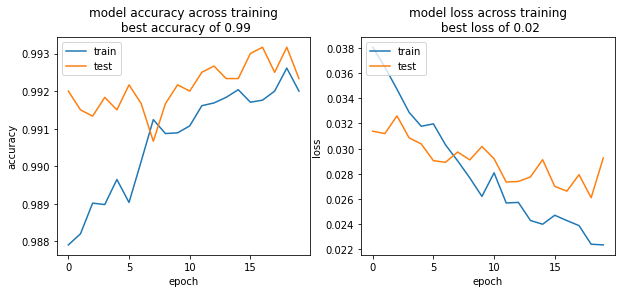

In [18]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

plot_graphs(model_history, model_performance)

In [15]:
y_test_class = np.argmax(y_test, axis = 1)

y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis = 1)

y_pred_max = np.zeros(y_pred.shape)
y_pred_max[np.arange(y_pred.shape[0]), y_pred_class] = 1

313/313 [==============================] - 1s 2ms/step


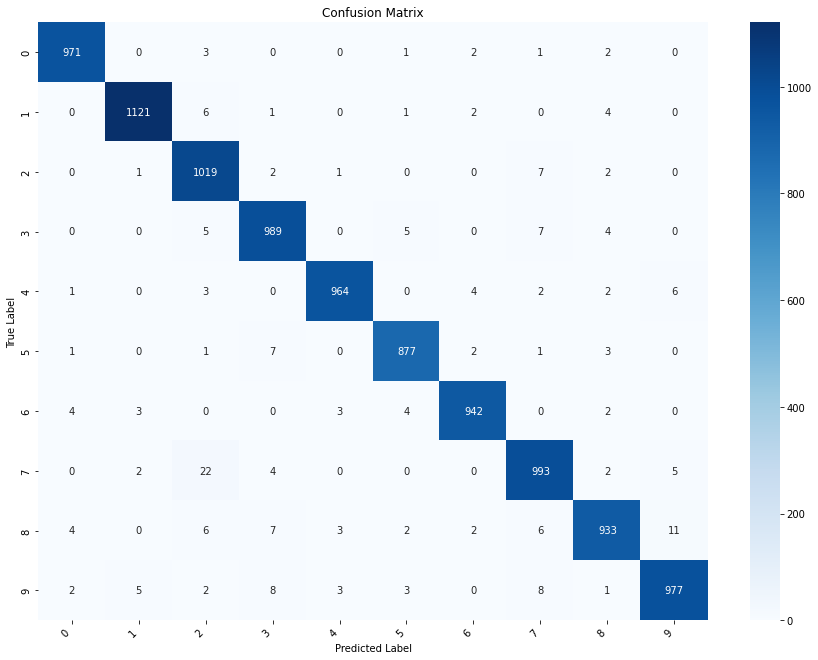

In [23]:
label_names = ['0','1','2','3','4','5','6','7','8','9']
labels = [0,1,2,3,4,5,6,7,8,9]
plot_confusion_matrix(y_test_class, y_pred_class, labels, plot_numbers = True, display_names = label_names)
